In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['VT']
data = get_iex_data(hun_etfs)
data

[             open   high    low  close   volume ticker
 date                                                  
 2015-01-15  59.30  59.37  58.70  58.72   279262     VT
 2015-01-16  58.63  59.47  58.62  59.44   252949     VT
 2015-01-20  59.75  59.81  59.16  59.55   771758     VT
 2015-01-21  59.68  60.00  59.42  59.99   424333     VT
 2015-01-22  60.18  60.73  59.77  60.68   373106     VT
 ...           ...    ...    ...    ...      ...    ...
 2019-12-24  80.80  80.92  80.65  80.74  1185706     VT
 2019-12-26  80.91  81.12  80.86  81.11   750116     VT
 2019-12-27  81.40  81.41  81.06  81.21  1034753     VT
 2019-12-30  81.31  81.36  80.65  80.73  1041510     VT
 2019-12-31  80.74  81.03  80.61  80.99  1034705     VT
 
 [1249 rows x 6 columns]]

In [4]:
vt = data[0]
vt.to_csv('vt.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[             open   high    low  close   volume ticker
 date                                                  
 2015-01-15  59.30  59.37  58.70  58.72   279262     VT
 2015-01-16  58.63  59.47  58.62  59.44   252949     VT
 2015-01-20  59.75  59.81  59.16  59.55   771758     VT
 2015-01-21  59.68  60.00  59.42  59.99   424333     VT
 2015-01-22  60.18  60.73  59.77  60.68   373106     VT
 ...           ...    ...    ...    ...      ...    ...
 2019-12-24  80.80  80.92  80.65  80.74  1185706     VT
 2019-12-26  80.91  81.12  80.86  81.11   750116     VT
 2019-12-27  81.40  81.41  81.06  81.21  1034753     VT
 2019-12-30  81.31  81.36  80.65  80.73  1041510     VT
 2019-12-31  80.74  81.03  80.61  80.99  1034705     VT
 
 [1249 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [9]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [10]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [11]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9887      0.021    -46.522      0.000      -1.030      -0.947
ar.L2         -0.0129      0.020     -0.656      0.512      -0.051       0.026
ma.L1          0.0106      2.274      0.005      0.996      -4.447       4.468
ma.L2         -1.0106      2.299     -0.440      0.660      -5.517       3.496
ma.S.L5       -0.0467      0.026     -1.806      0.071      -0.097       0.004
ma.S.L10      -0.0299      0.023     -1.276      0.202      -0.076       0.016
sigma2         0.2939      0.667      0.441      0.660      -1.014       1.602


In [12]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('vt_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.9887,0.021,-46.522,0.000,-1.030,-0.947
2,ar.L2,-0.0129,0.020,-0.656,0.512,-0.051,0.026
3,ma.L1,0.0106,2.274,0.005,0.996,-4.447,4.468
4,ma.L2,-1.0106,2.299,-0.440,0.660,-5.517,3.496
5,ma.S.L5,-0.0467,0.026,-1.806,0.071,-0.097,0.004
6,ma.S.L10,-0.0299,0.023,-1.276,0.202,-0.076,0.016
7,sigma2,0.2939,0.667,0.441,0.660,-1.014,1.602


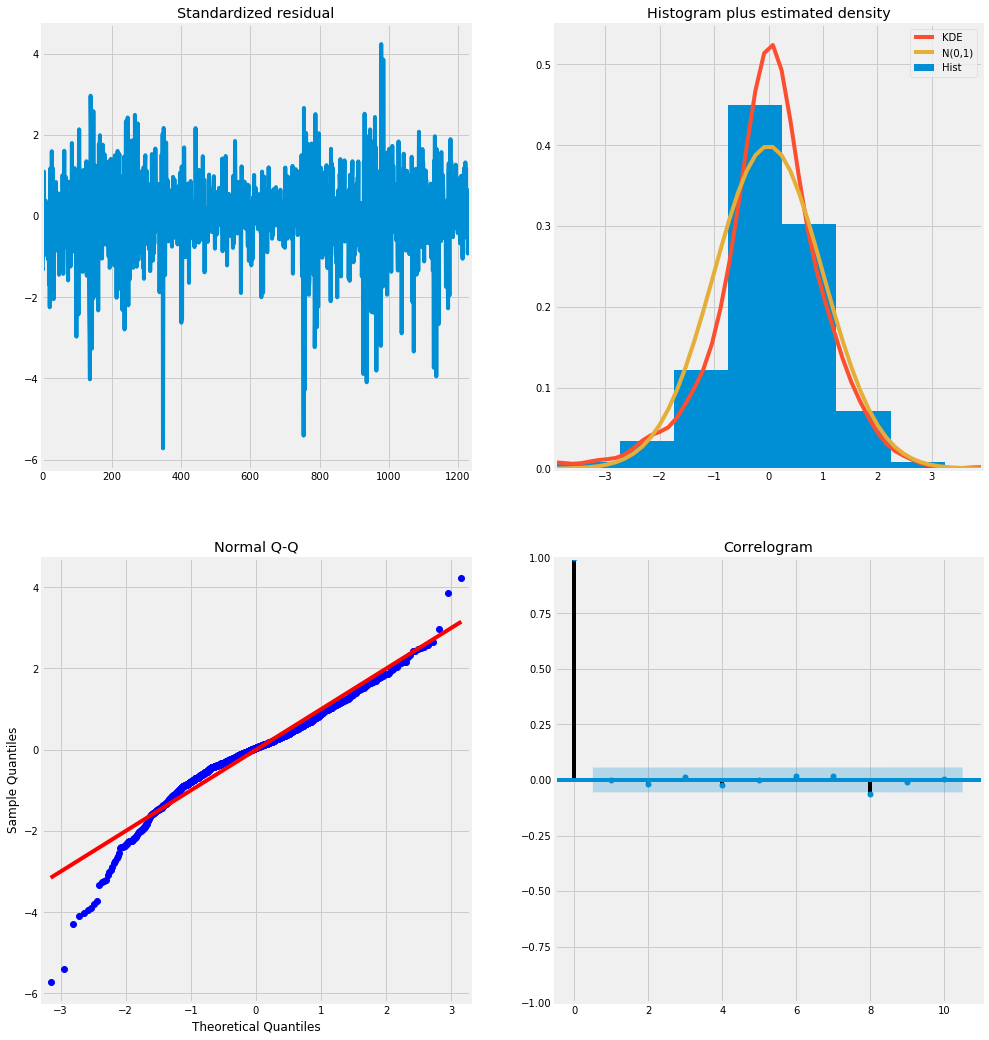

In [13]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('vtoutput.png')
plt.show()

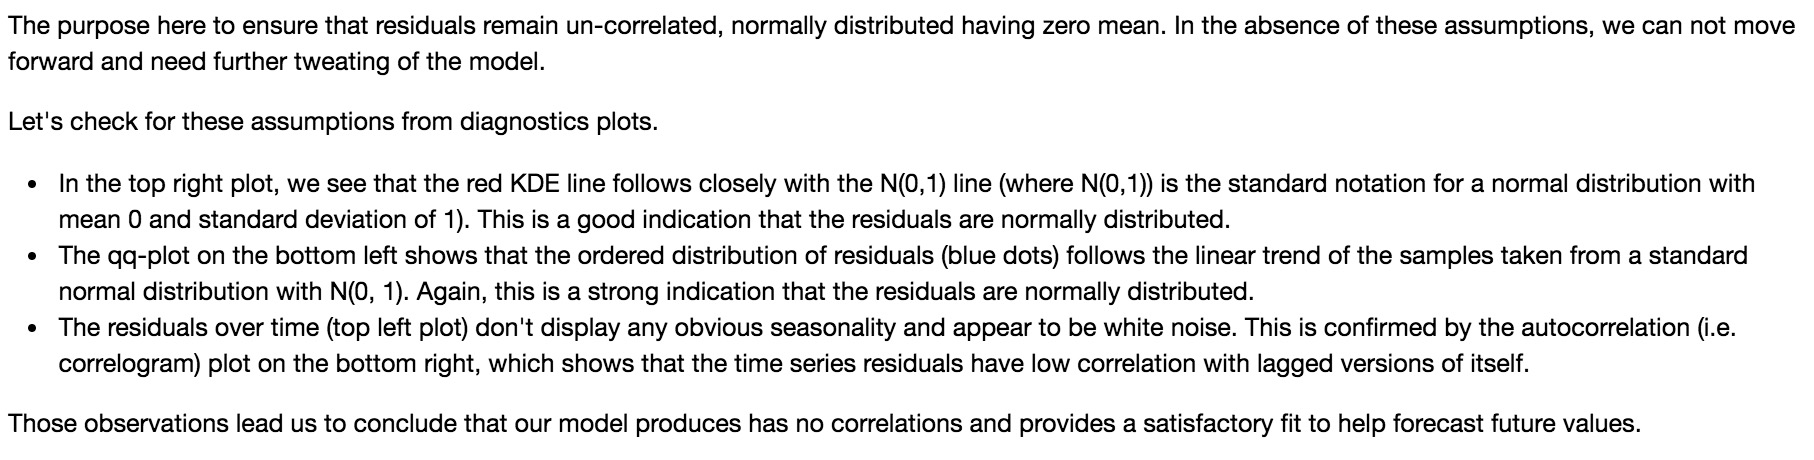

In [14]:
# plt.savefig('arima1.png')

In [15]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

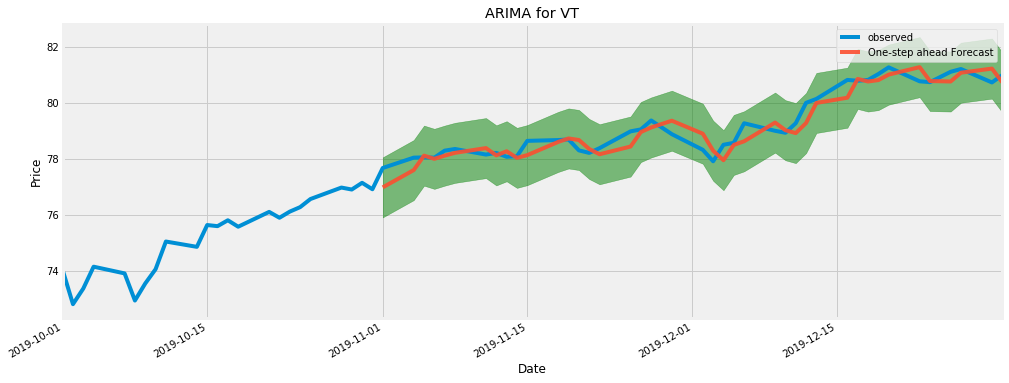

In [16]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for VT')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('vt_arima.png')
plt.show()

In [17]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.12


In [18]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

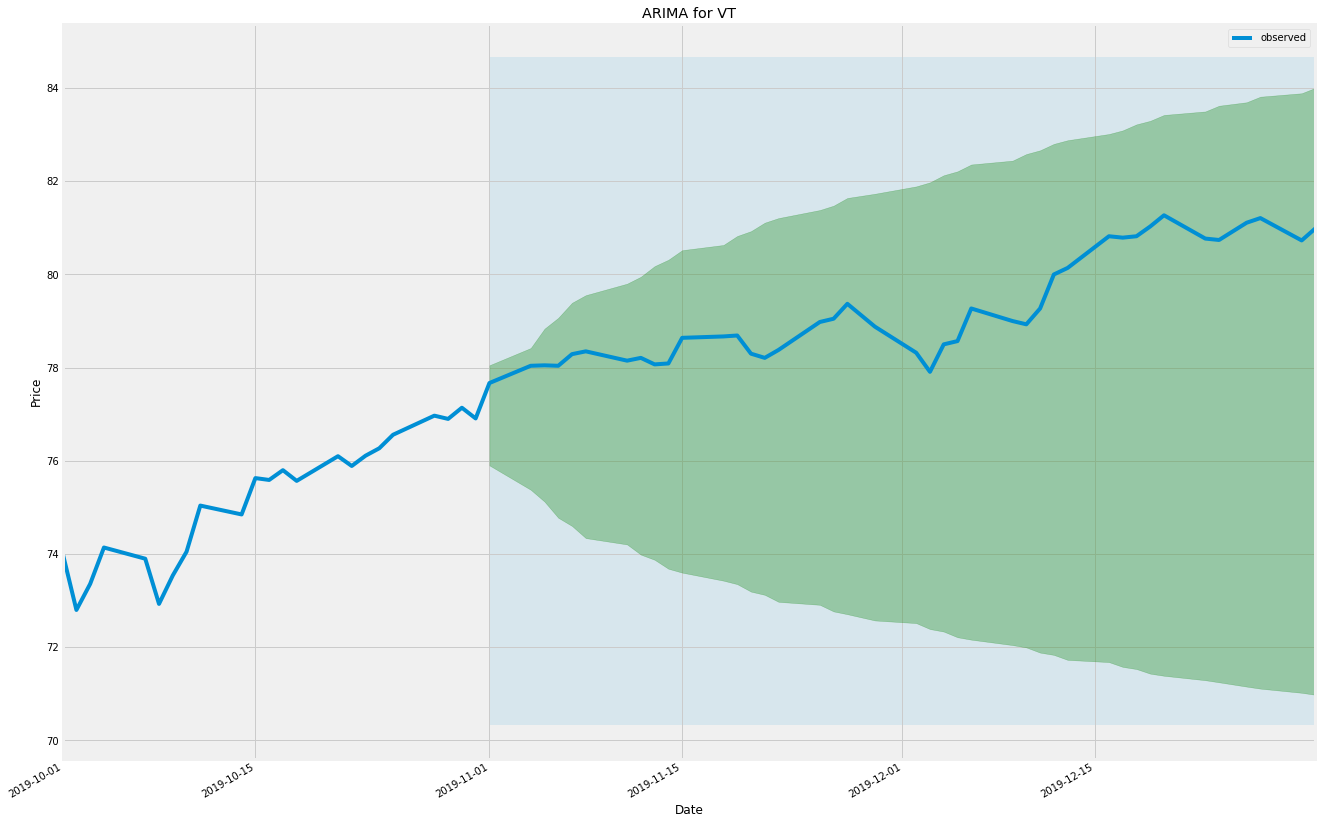

In [19]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for VT')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('vt_arima2.png')
plt.show()

In [20]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5.15


In [21]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [22]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

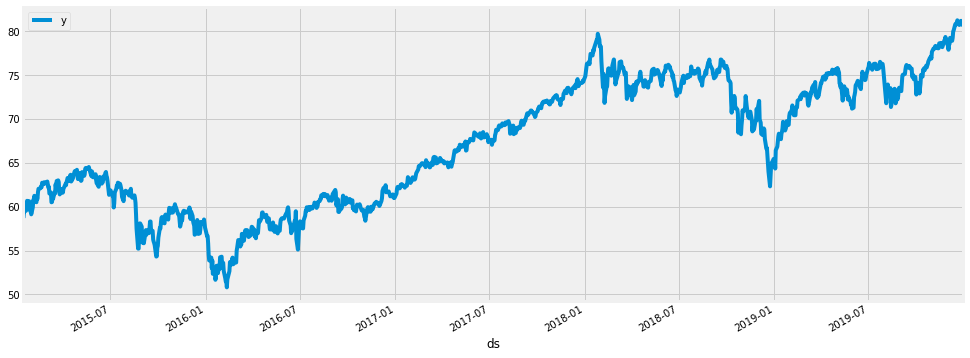

In [23]:
spy.set_index('ds').plot()

In [24]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [25]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [26]:
vt_df_novjan = df.tail(71)
vt_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [27]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [28]:
# pull_df

In [29]:
vt_yf = pd.read_csv('VT_yf.csv')
vt_yf = vt_yf.rename(columns={"Date": "ds"})
vt_yf['ds'] = pd.to_datetime(vt_yf['ds'])

vt_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [30]:
vt_yf1 = vt_yf[['ds','Adj Close']]
vt_yf1

,ds,Adj Close
0,2019-11-01,77.086060
1,2019-11-04,77.453285
2,2019-11-05,77.463211
3,2019-11-06,77.453285
4,2019-11-07,77.701401
5,2019-11-08,77.760948
6,2019-11-11,77.562454
7,2019-11-12,77.622002
8,2019-11-13,77.483055
9,2019-11-14,77.502899


In [31]:
comb = vt_df_novjan.join(vt_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('vt_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,77.932665,75.530417,80.128175,78.078545,0.145880,0.19%
1220,2019-11-19,78.013631,75.538669,80.375891,78.098396,0.084765,0.11%
1221,2019-11-20,78.069088,75.712658,80.476738,77.711327,-0.357761,-0.46%
1222,2019-11-21,78.124393,75.558139,80.841855,77.622002,-0.502391,-0.65%
1223,2019-11-22,78.180506,75.784924,80.673447,77.790726,-0.389780,-0.50%
1224,2019-11-25,78.339786,75.980051,80.846406,78.386215,0.046429,0.06%
1225,2019-11-26,78.429310,76.036764,80.648614,78.455688,0.026378,0.03%
1226,2019-11-27,78.491632,76.042680,80.934667,78.773285,0.281653,0.36%
1227,2019-11-29,78.609889,76.091808,81.015274,78.286964,-0.322925,-0.41%
1228,2019-12-02,78.756709,76.438258,81.075866,77.731178,-1.025531,-1.32%


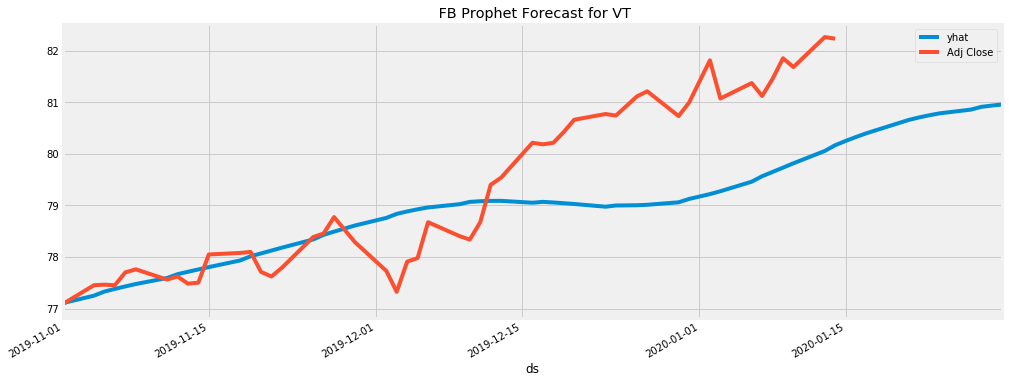

In [32]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for VT')
plt.savefig('vt_fbproph_forecast.png')

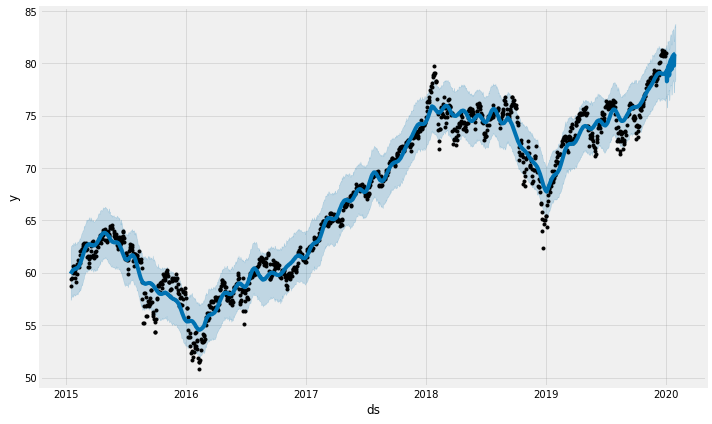

In [33]:
p.plot(df)
plt.savefig('vt_fbp2.png')

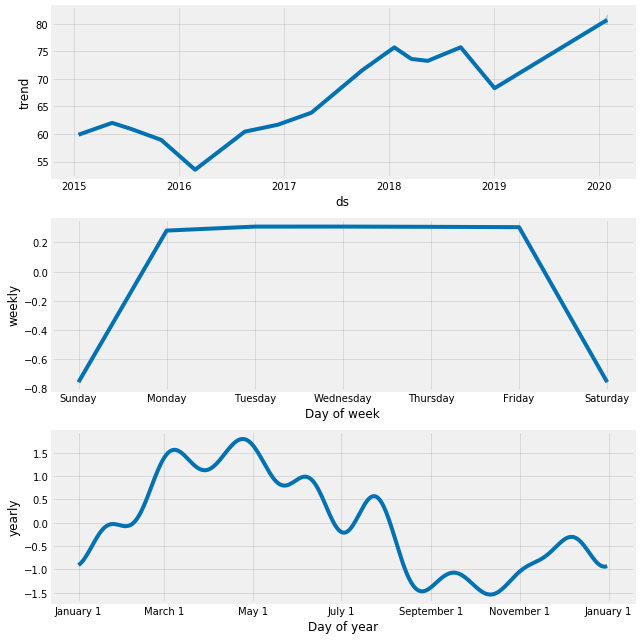

In [34]:
p.plot_components(out)
# plt.title('DIA Seasonality Trends')
plt.savefig('vt_seasonality.png')

In [35]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [36]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
pred = out[['ds', 'yhat']].set_index('ds')
pred

,yhat
ds,
2019-12-01,76.266866
2019-12-02,77.648584
2019-12-03,77.686133
2019-12-04,77.686421
2019-12-05,77.656863
2019-12-06,77.621064
2019-12-07,76.187005
2019-12-08,76.146219
2019-12-09,77.473770
